<a href="https://colab.research.google.com/github/sabrinazulfa/data-capstone-ibm-granite/blob/main/Mental_Health_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas langchain_community replicate matplotlib seaborn transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.65
    Uninstalling langchain-core-0.3.65:
      Successfully uninstalled langchain-core-0.3.65
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.25
    Uninstalling langchain-0.3.25:
      Successfully uninstalled langchain-0.3.25


In [ ]:
import os
from google.colab import userdata

api_token = userdata.get("api_token")

# Put token to env variable
os.environ["REPLICATE_API_TOKEN"] = api_token

In [ ]:
from langchain_community.llms import Replicate

# Define the model
llm = Replicate(
  model="ibm-granite/granite-3.3-8b-instruct",
)

In [28]:
from langchain_community.llms import Replicate

# Define parameters
parameters = {
  "top_k": 5,
  "top_p": 1.0,
  "max_tokens": 2048,
  "min_tokens": 0,
  "random_seed": None,
  "repetition_penalty": 1.0,
  "temperature": 0.7,
  "stopping_criteria": "length (256 tokens)",
  "stopping_sequence": None
}

# Define the model
llm = Replicate(
  model="ibm-granite/granite-3.3-8b-instruct",
  input=parameters
)

In [ ]:
!pip install pandas
!pip install -U langchain langchain-community langchain-experimental replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 3.6 MB/s eta 0:00:00


In [12]:
import pandas as pd

df = pd.read_csv("dataset-mental-health.zip")
df

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34,Female,Employed,On-site,Yes,Yes,5,6.1,3,9,21,8,90.0,Medium
9996,47,Male,Employed,On-site,Yes,No,1,5.7,3,5,12,45,90.8,Medium
9997,56,Female,Employed,On-site,Yes,No,1,8.3,0,1,18,7,99.2,Medium
9998,24,Male,Employed,On-site,Yes,Yes,9,6.1,0,28,21,32,56.7,High


In [13]:
from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent
)

agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,
    allow_dangerous_code=True,  # opt-in for Python REPL execution
)

In [16]:
agent.invoke({
    "input": "What's the mean of the first column?"
})



> Entering new AgentExecutor chain...
Thought: To find the mean of the first column, I need to identify the column and use the pandas mean function. The first column, according to the header, is 'age'. I will use the `mean()` function on this column.

Action: python_repl_ast

Action Input: df['age'].mean()

41.5576I now know the final answer
Final Answer: The mean of the first column, 'age', is 41.5576.

> Finished chain.


{'input': "What's the mean of the first column?",
 'output': "The mean of the first column, 'age', is 41.5576."}

In [18]:
agent.invoke({
    "input": "Calculate the number of people who have received mental health treatment and the number who haven't. Provide these counts."
})



> Entering new AgentExecutor chain...
Thought: I need to count the number of rows where 'seeks_treatment' is 'Yes' and where it's 'No'. I will use pandas' boolean indexing and the `sum()` function for this.

Action: python_repl_ast

Action Input: 
```python
treatment_seekers = df[df['seeks_treatment'] == 'Yes'].shape[0]
non_treatment_seekers = df[df['seeks_treatment'] == 'No'].shape[0]
(treatment_seekers, non_treatment_seekers)
```

(3988, 6012)Final Answer: There are 3988 individuals who seek mental health treatment and 6012 individuals who do not seek mental health treatment.

> Finished chain.


{'input': "Calculate the number of people who have received mental health treatment and the number who haven't. Provide these counts.",
 'output': 'There are 3988 individuals who seek mental health treatment and 6012 individuals who do not seek mental health treatment.'}

In [20]:
agent.invoke({
    "input": "What are the unique values in the 'Gender' column?"
})



> Entering new AgentExecutor chain...
Thought: To find the unique values in the 'Gender' column of the dataframe `df`, I will use the `unique()` function from pandas.

Action: python_repl_ast

Action Input: 
```python
df['gender'].unique()
```

['Male' 'Female' 'Non-binary' 'Prefer not to say']The unique values in the 'Gender' column are 'Male', 'Female', 'Non-binary', and 'Prefer not to say'.

Final Answer: The unique values in the 'Gender' column are 'Male', 'Female', 'Non-binary', and 'Prefer not to say'.

> Finished chain.


{'input': "What are the unique values in the 'Gender' column?",
 'output': "The unique values in the 'Gender' column are 'Male', 'Female', 'Non-binary', and 'Prefer not to say'."}

In [25]:
agent.invoke({
  "input": "List the top 5 features most correlated with whether a respondent has a history of mental illness"
})



> Entering new AgentExecutor chain...
Thought: To find the top 5 features most correlated with whether a respondent has a history of mental illness, we need to calculate the correlation between each feature (excluding 'mental_health_history') and 'mental_health_history'. We'll use the `corr()` function from pandas to compute the correlation matrix, then filter for correlations with 'mental_health_history' and sort them in descending order to find the top 5.

Action: python_repl_ast

Action Input:
```python
import pandas as pd

# Assuming df is already defined and loaded

# Compute the correlation matrix
corr_matrix = df[['age', 'gender_Male', 'employment_status_Employed', 'work_environment_On-site', 'seeks_treatment', 'stress_level', 'sleep_hours', 'physical_activity_days', 'depression_score', 'anxiety_score', 'social_support_score', 'productivity_score']].corr()

# Filter correlations with 'mental_health_history'
mental_health_corr = corr_matrix['mental_health_history'].drop('mental

ModelError: Prediction failed for an unknown reason. It might have run out of memory? (exitcode -9)

In [35]:
# Then recreate the agent with the new LLM instance
from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent
)

agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,
    allow_dangerous_code=True,  # opt-in for Python REPL execution
)



> Entering new AgentExecutor chain...


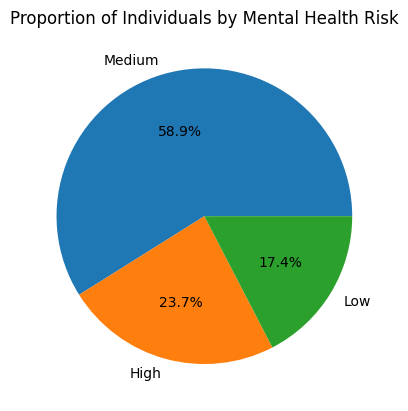

Thought: To create a pie chart showing the proportion of individuals in each category of mental_health_risk, I need to count the occurrences of each mental_health_risk category and then use matplotlib or seaborn to create the pie chart.

Action: python_repl_ast

Action Input:
```python
import matplotlib.pyplot as plt

# Count occurrences of each mental_health_risk category
risk_counts = df['mental_health_risk'].value_counts()

# Create a pie chart
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Individuals by Mental Health Risk')
plt.show()
```



ModelError: Director: unexpected error handling prediction (E9243)

In [36]:
agent.invoke({
  "input": "Create a pie chart showing the proportion of individuals in each category of mental_health_risk."
})